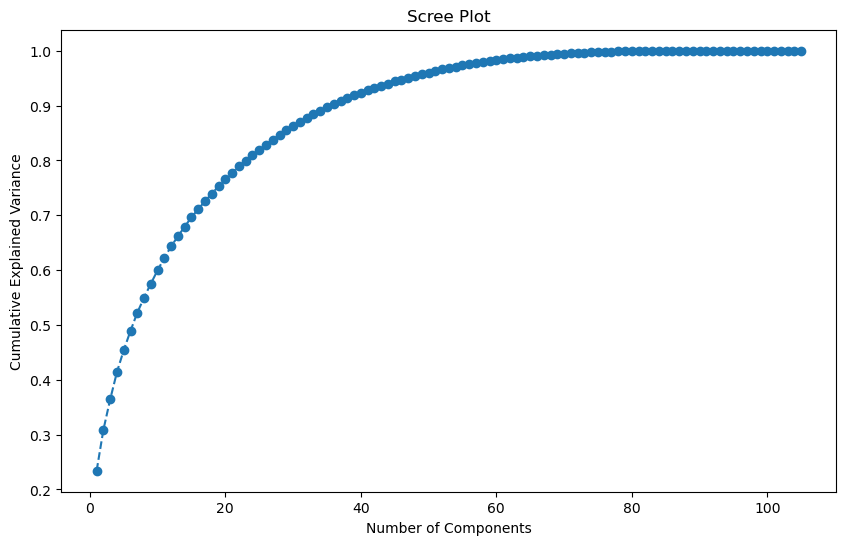

Cumulative Explained Variance by Component:
Number of Components: 1, Cumulative Explained Variance: 0.2342
Number of Components: 5, Cumulative Explained Variance: 0.4540
Number of Components: 10, Cumulative Explained Variance: 0.5997
Number of Components: 15, Cumulative Explained Variance: 0.6962
Number of Components: 20, Cumulative Explained Variance: 0.7655
Number of Components: 25, Cumulative Explained Variance: 0.8195
Number of Components: 30, Cumulative Explained Variance: 0.8627
Number of Components: 35, Cumulative Explained Variance: 0.8968
Number of Components: 40, Cumulative Explained Variance: 0.9231
Number of Components: 45, Cumulative Explained Variance: 0.9439
Number of Components: 50, Cumulative Explained Variance: 0.9603
Number of Components: 55, Cumulative Explained Variance: 0.9732
Number of Components: 60, Cumulative Explained Variance: 0.9828
Number of Components: 65, Cumulative Explained Variance: 0.9898
Number of Components: 70, Cumulative Explained Variance: 0.994

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import Rotator
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드
data = pd.read_csv('data2.csv', encoding ='utf8')

data = data.drop(columns='date')

# 데이터 정규화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# PCA 수행
pca = PCA()
principal_components = pca.fit_transform(data_scaled)

# 누적 분산 설명 비율
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# 스크리 플롯 그리기 > 통해 주성분의 갯수를 몇개로 할지 파악 > 누적 분산 설명력이 70% ~ 90% 이상인 부분에서 채택
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

# 누적 분산 설명 비율 출력
print("Cumulative Explained Variance by Component:")
for i in range(1, len(cumulative_variance) + 1):
    if i == 1 or i % 5 == 0:
        print(f'Number of Components: {i}, Cumulative Explained Variance: {cumulative_variance[i-1]:.4f}')

In [5]:
# PCA 수행 (컴포넌트 수 줄이기)
pca = PCA(n_components=70)
principal_components = pca.fit_transform(data_scaled)

# 주성분 로딩 행렬
loading_matrix = pca.components_
#print("Original PCA Loading Matrix:\n", loading_matrix)

# Varimax 회전 함수 직접 구현
def varimax(Phi, gamma = 1.0, q = 30, tol = 1e-5):
    p,k = Phi.shape
    R = np.eye(k)
    d = 0
    for i in range(q):
        d_old = d
        Lambda = np.dot(Phi, R)
        u,s,vh = np.linalg.svd(np.dot(Phi.T, np.asarray(Lambda)**3 - 
                                       (gamma/p) * np.dot(Lambda, 
                                           np.diag(np.diag(np.dot(Lambda.T, Lambda))))))
        R = np.dot(u, vh)
        d = np.sum(s)
        if d_old != 0 and d/d_old < 1 + tol: break
    return np.dot(Phi, R)

# Varimax 회전 적용
rotated_loading_matrix = varimax(loading_matrix.T).T

#print("Rotated Loading Matrix:\n", rotated_loading_matrix)

# 회전된 성분 확인
rotated_components = np.dot(data_scaled, rotated_loading_matrix.T)
rotated_components_df = pd.DataFrame(rotated_components)
#print(rotated_components_df.head())

# 로딩 행렬을 데이터프레임으로 변환하여 보기 쉽게 정리
loading_df = pd.DataFrame(rotated_loading_matrix, columns=data.columns[:len(rotated_loading_matrix[0])])
#print("Rotated Loading DataFrame:\n", loading_df)

# 각 주성분별 주요 변수 확인 (상관계수가 높은 변수들)
for i, component in loading_df.iterrows():
    print(f"\nComponent {i+1} significant variables:")
    significant_vars = component[component.abs() > 0.5]  # 상관계수 절대값이 0.5 이상인 변수들
    significant_vars = significant_vars.sort_values(ascending=False, key=abs)  # 절대값 기준으로 정렬
    for var_name, value in significant_vars.items():
        print(f"{var_name}: {value:.4f}")


Component 1 significant variables:

Component 2 significant variables:
corner_kicks_in: 0.7114

Component 3 significant variables:
tackles_def_3rd: 0.7321

Component 4 significant variables:
passes_completed_long: -0.8489

Component 5 significant variables:
gca_shots: 0.9449

Component 6 significant variables:
gca_passes_live: -0.7536
gca: -0.5790

Component 7 significant variables:
take_ons_won: -0.7159

Component 8 significant variables:
challenges_lost: -0.7810
challenges: -0.6069

Component 9 significant variables:
pens_made: -0.7113
pens_att: -0.6950

Component 10 significant variables:
sca_defense: -0.9631

Component 11 significant variables:
sca_shots: 0.9442

Component 12 significant variables:
red_card: 0.9911

Component 13 significant variables:
errors: 0.9539

Component 14 significant variables:
goal: 0.7395
substitute_out: -0.6682

Component 15 significant variables:
passes_blocked: -0.9814

Component 16 significant variables:
tackles_att_3rd: 0.9237

Component 17 signific